# Training & Validating

Experiments were conducted using:
- `mb_vae_dti/training/run.py`: command line interface for training
- and the scripts in `scripts/training/` for running the experiments

This notebook shows some plots and analysis of the unsupervised pretraining, general DTI training and benchmark fine-tuning results.

In [76]:
from resolve import *

Setting working directory to: /home/robsyc/Desktop/thesis/MB-VAE-DTI


In [ ]:
# Analyzing collected results

from mb_vae_dti.validating.analysis import *

df = load_gridsearch_results("notebooks/results/baseline_kiba_rand/")

df

top_5 = df.sort_values(by="best_val_loss", ascending=True).head(5)
print(round(get_test_averages(top_5), 4))
print(f"Params: {top_5['trainable_params'].mean() / 1000000:.1f}M")

# # # get subsets with desired distinction (encoder_type and aggregator_type)
# with_concat = df[df["config.model.aggregator_type"] == "concat"]
# with_attentive = df[df["config.model.aggregator_type"] == "attentive"]

# # # get 5 best performers
# with_concat_best = with_concat.sort_values(by="best_val_loss", ascending=True).head(5)
# with_attentive_best = with_attentive.sort_values(by="best_val_loss", ascending=True).head(5)

# # # get stats
# print(f"Params: {with_concat_best['trainable_params'].mean() / 1000000:.1f}M")
# print(round(get_test_averages(with_concat_best), 4))
# print("-" * 100)
# print(f"Params: {with_attentive_best['trainable_params'].mean() / 1000000:.1f}M")
# print(round(get_test_averages(with_attentive_best), 4))

# cols_of_interest = ["experiment_name", "trainable_params", "test/real_pKd_mse", "test/real_pKi_mse", "test/real_KIBA_mse", "test/binary_accuracy", "test/binary_f1", "test/binary_auprc"]
# df_test = df[cols_of_interest].copy()
# df_test.columns = [col.replace("test/", "") if col.startswith("test/") else col for col in df_test.columns]
# print(df_test.to_string(index=False, float_format="{:8.4f}".format))

# df = load_gridsearch_results("notebooks/results/train_cold/")
# cols_of_interest = ["experiment_name", "trainable_params", "test/real_pKd_mse", "test/real_pKi_mse", "test/real_KIBA_mse", "test/binary_accuracy", "test/binary_f1", "test/binary_auprc"]
# df_test = df[cols_of_interest].copy()
# df_test.columns = [col.replace("test/", "") if col.startswith("test/") else col for col in df_test.columns]
# print(df_test.to_string(index=False, float_format="{:8.4f}".format))

2025-08-03 16:46:33,824 - mb_vae_dti.validating.analysis - INFO - Loading 64 result files from notebooks/results/baseline_kiba_rand


test/loss              0.1573
test/Y_KIBA_ci         0.8595
test/Y_KIBA_mse        0.1573
test/Y_KIBA_pearson    0.8749
test/Y_KIBA_r2         0.7648
test/Y_KIBA_rmse       0.3966
dtype: float64
Params: 16.9M


In [78]:
top_5

,experiment_name,best_val_loss,best_epoch,trainable_params,val/loss,val/Y_KIBA_ci,val/Y_KIBA_mse,val/Y_KIBA_pearson,val/Y_KIBA_r2,val/Y_KIBA_rmse,...,config.loss.weights,config.data.batch_size,config.data.h5_path,config.data.drug_features,config.data.target_features,config.model.embedding_dim,config.model.hidden_dim,config.model.n_layers,config.model.dropout,config.model.encoder_type
61,baseline_finetune_KIBA_cold_b00c0004,0.333460,50,16841728,0.333460,0.760062,0.333460,0.699008,0.472883,0.688165,...,1_0_0_0,64,data/input/dti.h5torch,FP-Morgan,FP-ESP,1024,512,3,0.1,resnet
28,baseline_finetune_KIBA_cold_b01c0004,0.338392,34,16841728,0.338392,0.753427,0.338392,0.690234,0.464987,0.670500,...,1_0_0_0,32,data/input/dti.h5torch,FP-Morgan,FP-ESP,1024,512,3,0.1,resnet
16,baseline_finetune_KIBA_cold_b00c0001,0.339152,26,12908544,0.339152,0.752964,0.339152,0.690663,0.463886,0.752744,...,1_0_0_0,64,data/input/dti.h5torch,FP-Morgan,FP-ESP,768,512,2,0.1,transformer
29,baseline_finetune_KIBA_cold_b00c0018,0.339814,45,17375488,0.339814,0.753953,0.339814,0.691998,0.462838,0.690825,...,1_0_0_0,64,data/input/dti.h5torch,FP-Morgan,FP-ESP,768,512,3,0.1,transformer
33,baseline_finetune_KIBA_cold_b00c0026,0.340133,26,12908544,0.340133,0.752621,0.340133,0.692200,0.462234,0.697769,...,1_0_0_0,32,data/input/dti.h5torch,FP-Morgan,FP-ESP,768,512,2,0.1,transformer


In [57]:
df.sort_values(by="best_val_loss", ascending=True)[
    ['experiment_name', 'best_val_loss', 'best_epoch', 'test/loss', 'config.data.batch_size',
     'config.model.embedding_dim', 'config.model.hidden_dim', 
     'config.model.n_layers', 'config.model.dropout', 'config.training.learning_rate',
     'config.model.encoder_type']#, 'config.model.aggregator_type']
    ].head(5)
# df.columns

,experiment_name,best_val_loss,best_epoch,test/loss,config.data.batch_size,config.model.embedding_dim,config.model.hidden_dim,config.model.n_layers,config.model.dropout,config.training.learning_rate,config.model.encoder_type
61,baseline_finetune_KIBA_cold_b00c0004,0.333460,50,0.369488,64,1024,512,3,0.1,0.0005,resnet
28,baseline_finetune_KIBA_cold_b01c0004,0.338392,34,0.371440,32,1024,512,3,0.1,0.0005,resnet
16,baseline_finetune_KIBA_cold_b00c0001,0.339152,26,0.366906,64,768,512,2,0.1,0.0005,transformer
29,baseline_finetune_KIBA_cold_b00c0018,0.339814,45,0.371739,64,768,512,3,0.1,0.0005,transformer
33,baseline_finetune_KIBA_cold_b00c0026,0.340133,26,0.371350,32,768,512,2,0.1,0.0005,transformer


In [52]:
df.columns

Index(['experiment_name', 'best_val_loss', 'best_epoch', 'trainable_params',
       'val/loss', 'val/Y_pKd_ci', 'val/Y_pKd_mse', 'val/Y_pKd_pearson',
       'val/Y_pKd_r2', 'val/Y_pKd_rmse', 'test/loss', 'test/Y_pKd_ci',
       'test/Y_pKd_mse', 'test/Y_pKd_pearson', 'test/Y_pKd_r2',
       'test/Y_pKd_rmse', 'total_training_time', 'avg_time_per_epoch',
       'total_epochs', 'config.training.learning_rate',
       'config.training.scheduler', 'config.loss.weights',
       'config.data.batch_size', 'config.data.h5_path',
       'config.data.drug_features', 'config.data.target_features',
       'config.model.embedding_dim', 'config.model.hidden_dim',
       'config.model.n_layers', 'config.model.dropout',
       'config.model.encoder_type'],
      dtype='object')

---

In [ ]:
# Generating a molecule from the limit distribution

from mb_vae_dti.training.diffusion.utils import *
import json
import torch

json_path = "data/processed/molecular_statistics.json"

stats = json.load(open(json_path))

dataset_name = "drugs_cold"

visualization_tools = MolecularVisualization(stats["general"]["atom_types"])
nodes_dist = DistributionNodes(stats["datasets"][dataset_name]["node_count_distribution"])
limit_dist = PlaceHolder(
    X=torch.tensor(stats["datasets"][dataset_name]["node_marginals"]), 
    E=torch.tensor(stats["datasets"][dataset_name]["edge_marginals"]), 
    y=torch.ones(1) / 1
)

print(f"Limit distribution\nX: {limit_dist.X.shape}\nE: {limit_dist.E.shape}")

n_nodes = nodes_dist.sample_n(1, device="cpu")
print(f"Number of nodes: {n_nodes} (sampled)")

arange = torch.arange(max(n_nodes), device="cpu").unsqueeze(0).expand(1, -1)
node_mask = arange < n_nodes.unsqueeze(1)

print(f"Node mask: {node_mask}")

z_T = sample_discrete_feature_noise(limit_dist=limit_dist, node_mask=node_mask)

print(f"Z_T.X.shape: {z_T.X.shape}")
print(f"Z_T.E.shape: {z_T.E.shape}")

edge_types = torch.argmax(z_T.E, dim=-1)
edge_types = edge_types# - 1
node_types = torch.argmax(z_T.X, dim=-1)


limit_mol = visualization_tools.mol_from_graphs(node_types[0], edge_types[0])

print(f"Successfully created molecule: {limit_mol}")
if limit_mol is not None:
    print(f"Molecule SMILES: {Chem.MolToSmiles(limit_mol)}")
else:
    print("Failed to create valid molecule") 


import rdkit.Chem as Chem
from rdkit.Chem import Draw

Draw.MolToFile(limit_mol, "limit_mol.png")

Limit distribution
X: torch.Size([8])
E: torch.Size([5])
Number of nodes: tensor([27]) (sampled)
Node mask: tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True]])
Z_T.X.shape: torch.Size([1, 27, 8])
Z_T.E.shape: torch.Size([1, 27, 27, 5])
Successfully created molecule: <rdkit.Chem.rdchem.Mol object at 0x757c5cd5a2e0>
Molecule SMILES: C.C.CC.cc1CC(C)(o(c)CC)=n234c(-n(c)n)-c(c-2O3)n-12Oc-2(c)(c)c-4


---

## Perturbation analysis

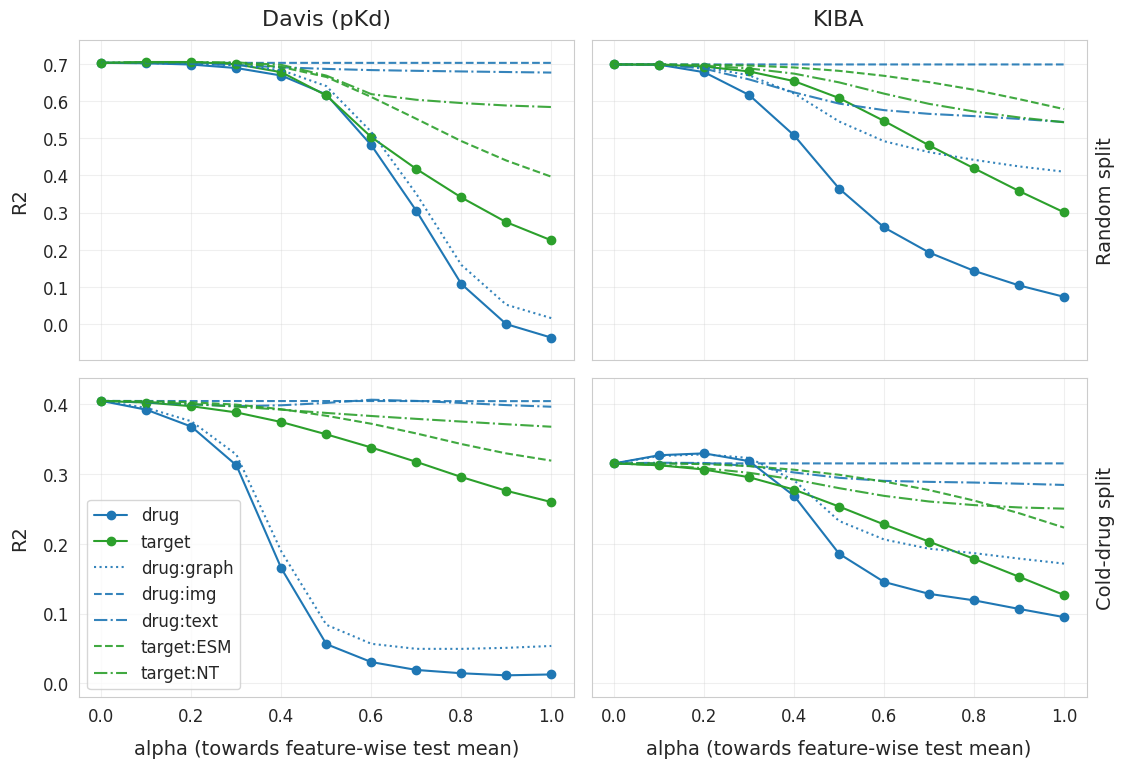

In [2]:
from mb_vae_dti.validating.analysis import plot_perturbation_overview

plot = plot_perturbation_overview(model='multi_modal', metric='r2')

0.7: O=C(NCCN1CCN(c2ccc(Cl)cc2Cl)CC1)c1cccc(Cl)c1
0.51: O=C(c1cc(Cl)c(Cl)c(Cl)c1)N1CCN2CCN(CC1)c1ccccc12
0.32: O=C(c1cccc(C#CCN2CCNCC2)c1)c1ccc(Cl)c(Cl)c1Cl
0.72: C#CCN(CCNC(=O)c1ccccc1)CCNc1cccc(Cl)c1Cl
0.56: NC(=O)c1ccc(N2CCN(CC#Cc3cccc(Cl)c3)CC2)c(Cl)c1
0.44: C#CCN1CCN(c2ccccc2NC(=O)c2ccc(Cl)c(Cl)c2)CC1
0.6: NC(=O)c1cc(Cl)c(Cl)c(N2CCN(CC#Cc3ccccc3)CC2)c1
0.84: O=C(NCCN1CCN(c2cccc(Cl)c2Cl)CC1)c1ccc(Cl)cc1
0.57: Cc1ccccc1N1CCN(CCNC(=O)c2ccc(Cl)c(Cl)c2)CC1
0.63: O=C(NCCCN1CCN(c2ccc(Cl)c(Cl)c2)CC1)c1ccccc1


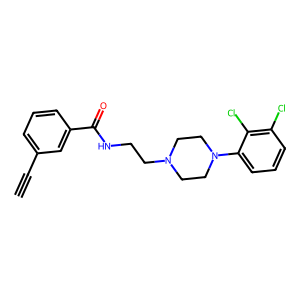

In [71]:
# Tanimoto similarity between two smiles

from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

target = "C#Cc1cccc(C(=O)NCCN2CCN(c3cccc(Cl)c3Cl)CC2)c1"
generated = [
        "O=C(NCCN1CCN(c2cccc(Cl)c2Cl)CC1)c1ccc(Cl)cc1",
        "O=C(NCCN1CCN(c2ccc(Cl)cc2Cl)CC1)c1cccc(Cl)c1",
        "Cc1ccccc1N1CCN(CCNC(=O)c2ccc(Cl)c(Cl)c2)CC1",
        "O=C(NCCCN1CCN(c2ccc(Cl)c(Cl)c2)CC1)c1ccccc1",
        "C#CCN1CCN(c2ccccc2NC(=O)c2ccc(Cl)c(Cl)c2)CC1",
        "NC(=O)c1cc(Cl)c(Cl)c(N2CCN(CC#Cc3ccccc3)CC2)c1",
        "NC(=O)c1ccc(N2CCN(CC#Cc3cccc(Cl)c3)CC2)c(Cl)c1",
        "C#CCN(CCNC(=O)c1ccccc1)CCNc1cccc(Cl)c1Cl",
        "O=C(c1cc(Cl)c(Cl)c(Cl)c1)N1CCN2CCN(CC1)c1ccccc12",
        "O=C(c1cccc(C#CCN2CCNCC2)c1)c1ccc(Cl)c(Cl)c1Cl"
]

mol = Chem.MolFromSmiles(target)
fp = Chem.RDKFingerprint(mol)

for s in set(generated):
    mol2 = Chem.MolFromSmiles(s)
    print(f"{round(Chem.DataStructs.TanimotoSimilarity(fp, Chem.RDKFingerprint(mol2)), 2)}: {s}")

Draw.MolToImage(mol)

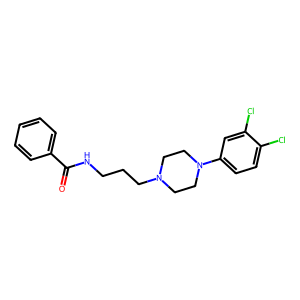

In [75]:
smiles = "O=C(NCCCN1CCN(c2ccc(Cl)c(Cl)c2)CC1)c1ccccc1"
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol)

In [102]:
# number of heavy atoms in SMILES

from rdkit import Chem

smiles = "c1ncc(CCCCCN2CCCCC2)[nH]1	"
mol = Chem.MolFromSmiles(smiles)

print(mol.GetNumHeavyAtoms())

16


---

In [281]:
from rdkit import Chem
from resolve import *
import pandas as pd
from mb_vae_dti.loading import *
from mb_vae_dti.processing.split import *

df = pd.read_csv("data/processed/dti.csv")
df = add_cold_drug_split(df)

df_test_true = df[((df["split_cold"] == "test") | (df["split_cold"] == "val")) & (df["Y"] == True)]
df_train_true = df[(df["split_cold"] == "train") & (df["Y"] == True)]

def get_heavy_atom_count(smiles):
    """Get heavy atom count from SMILES string"""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        return mol.GetNumHeavyAtoms()
    except:
        return None

unique_drugs = df_test_true['Drug_SMILES'].unique()
heavy_atom_counts = {smiles: get_heavy_atom_count(smiles) for smiles in unique_drugs}
valid_drugs = {smiles for smiles, count in heavy_atom_counts.items() 
               if count is not None and 22 <= count <= 35}

df_filtered = df_test_true[df_test_true['Drug_SMILES'].isin(valid_drugs)]

aa_counts = df_filtered["Target_AA"].value_counts()
df_sub = df_filtered[df_filtered["Target_AA"].isin(aa_counts[aa_counts.between(64, 128)].index)]

df_train_true_sub = df_train_true[df_train_true["Target_AA"].isin(df_sub["Target_AA"].unique())]
targets = df_train_true_sub["Target_AA"].value_counts().sort_values(ascending=True).head(32).index

df = df[df["Target_AA"].isin(targets)]

print(f"Unique targets: {len(df['Target_AA'].unique())}")
print(f"Unique drugs: {len(df['Drug_SMILES'].unique())}")
print(f"Interactions observed: {len(df)}")
print(f"Number of possible interactions: {len(df['Drug_SMILES'].unique()) * len(df['Target_AA'].unique()):,}")
print(f"Number of positive interactions: {len(df[df['Y'] == True])}")
print(f"Positive interactions in train set: {len(df[(df['Y'] == True) & (df['split_cold'] == 'train')])}")
print(f"Positive interactions in test set: {len(df[(df['Y'] == True) & (df['split_cold'] == 'test')])}")
print(f"Positive interactions in val set: {len(df[(df['Y'] == True) & (df['split_cold'] == 'val')])}")

Unique targets: 32
Unique drugs: 36426
Interactions observed: 44485
Number of possible interactions: 1,165,632
Number of positive interactions: 16749
Positive interactions in train set: 13353
Positive interactions in test set: 1717
Positive interactions in val set: 1679


In [282]:
generated = pd.read_csv("notebooks/results/conditional/conditional_generation_results.csv")
generated

,target_idx,sample_idx,sampling_strategy,sampling_type,diff_idx,optimization_score,smiles,valid,error
0,0,0,0,random,0,0.995648,COc1cc(Cl)ccc1N1CCOc2cc(ccc2OCC(=O)CF)C1,True,NaN
1,0,0,0,random,1,0.995648,O=C(CCNCc1nccc(OCc2cccc(Cl)c2)c1F)NC=CF,True,NaN
2,0,0,0,random,2,0.995648,COc1c(C)cccc1Cl.FC1CNCN(c2ccnc(Cl)c2)CCO1,True,NaN
3,0,0,0,random,3,0.995648,CN1Cc2ccnc(c2)OCC(C(F)Cl)N(C)c2cc(ccc2F)C1=O,True,NaN
4,0,0,0,random,4,0.995648,COc1cc2cc(Cl)c1CN(CCF)CCO2.NC(=O)c1ccccc1,True,NaN
...,...,...,...,...,...,...,...,...,...
16379,31,31,0,random,11,0.991492,C=C(c1ccc2c(c1)-c1(nnc(=O)o1)CN2C(=O)NC(C)C)N(...,True,NaN
16380,31,31,0,random,12,0.991492,CC1OC2(C)C=C3c4nn5c6c2cc(cc6c4N5C)NC(=O)NC31C....,False,NaN
16381,31,31,0,random,13,0.991492,CCCC(C)C1Oc2cccc3c(cc2)NONC(=O)c2nnc(C)(o2)c1c...,False,NaN
16382,31,31,0,random,14,0.991492,CNC(=O)c1ccc(C2Cc3cccc(c3)C(C)O2)cc1C1(C(=O)NC...,True,NaN


In [339]:
generated[
    (generated["target_idx"] == 8) &
    (generated["smiles"] == "Nc1ccc(-c2csc3ncnc(N)c23)cc1.c1ccccc1")
]

,target_idx,sample_idx,sampling_strategy,sampling_type,diff_idx,optimization_score,smiles,valid,error
4321,8,14,1,learned,1,0.855438,Nc1ccc(-c2csc3ncnc(N)c23)cc1.c1ccccc1,True,NaN


In [365]:
from rdkit.Chem import rdFingerprintGenerator

fp_generator = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)
target_idx = 7
# 7, 8, 19
# use 8 for test, 7 for train example?!

generated_smiles = generated[generated["target_idx"] == target_idx]["smiles"].unique()
target_smiles = df[(df["Target_AA"] == targets[target_idx]) & (df["Y"] == True)]["Drug_SMILES"].unique()
print(f"Number of target SMILES: {len(target_smiles)}")
print(f"Number of generated SMILES: {len(generated_smiles)}")

# Handle invalid SMILES that return None from MolFromSmiles
target_fps = []
target_smiles_valid = []
for smiles in target_smiles:
    mol = Chem.MolFromSmiles(smiles, sanitize=True)
    if mol is not None:
        target_fps.append(fp_generator.GetFingerprint(mol))
        target_smiles_valid.append(smiles)

generated_fps = []
generated_smiles_valid = []
for smiles in generated_smiles:
    mol = Chem.MolFromSmiles(smiles, sanitize=True)
    if mol is not None:
        generated_fps.append(fp_generator.GetFingerprint(mol))
        generated_smiles_valid.append(smiles)

target_fps = np.array(target_fps, dtype=np.bool_)
generated_fps = np.array(generated_fps, dtype=np.bool_)

print(f"\nNumber of target fingerprints: {target_fps.shape}")
print(f"Number of generated fingerprints: {generated_fps.shape}")

# Compute Tanimoto similarity matrix efficiently
# For binary fingerprints: Tanimoto = intersection / union = (A & B).sum() / (A | B).sum()
similarity_matrix = np.zeros((len(target_fps), len(generated_fps)), dtype=np.float32)

for i, target_fp in enumerate(target_fps):
    # Vectorized computation for all generated molecules at once
    intersection = (target_fp[None, :] & generated_fps).sum(axis=1)  # (n_generated,)
    union = (target_fp[None, :] | generated_fps).sum(axis=1)  # (n_generated,)
    
    # Avoid division by zero (though shouldn't happen with Morgan fingerprints)
    with np.errstate(divide='ignore', invalid='ignore'):
        similarities = intersection / union
        similarities = np.nan_to_num(similarities, nan=0.0)
    
    similarity_matrix[i, :] = similarities

k = 5
results = []
for i, smiles in enumerate(target_smiles_valid):
    similarities = similarity_matrix[i, :]
    top_k_matrix_indices = np.argsort(similarities)[-k:][::-1]
    top_k_generated_scores = [similarities[idx] for idx in top_k_matrix_indices]
    top_k_generated_smiles = [generated_smiles_valid[idx] for idx in top_k_matrix_indices]
    results.append({
        "target_smiles": smiles,
        "top_k_generated_smiles": top_k_generated_smiles,
        "top_k_generated_scores": top_k_generated_scores
    })

min_sim = 0.5
results_filtered = [result for result in results if result["top_k_generated_scores"][0] >= min_sim]

pd.DataFrame(results_filtered)

Number of target SMILES: 459
Number of generated SMILES: 510

Number of target fingerprints: (459, 2048)
Number of generated fingerprints: (272, 2048)


,target_smiles,top_k_generated_smiles,top_k_generated_scores
0,Cc1cccc(N2CCN(CCCCCCN3CCN(c4ccccc4)CC3)CC2)c1,"[Oc1cccc(NCCCN2CCN(c3ccccc3)CC2)c1, CN(CCN1CCN...","[0.5, 0.46938777, 0.46938777, 0.45238096, 0.40..."


In [369]:
results_filtered

[{'target_smiles': 'Cc1cccc(N2CCN(CCCCCCN3CCN(c4ccccc4)CC3)CC2)c1',
  'top_k_generated_smiles': ['Oc1cccc(NCCCN2CCN(c3ccccc3)CC2)c1',
   'CN(CCN1CCN(c2cccc(O)c2)CC1)c1ccccc1',
   'CN(CCN1CCN(c2ccccc2)CC1)c1cccc(O)c1',
   'CN1CCN2CCN(CC1)c1cccc2c1.Oc1ccccc1',
   'CN1CCN(c2ccc(O)cc2)CC1.c1ccc(N2CC2)cc1'],
  'top_k_generated_scores': [0.5,
   0.46938777,
   0.46938777,
   0.45238096,
   0.4047619]}]

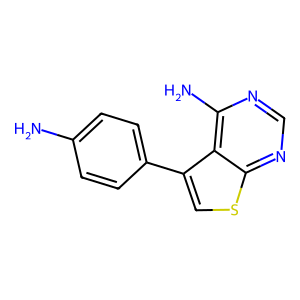

In [364]:
smiles = "Nc1ccc(-c2csc3ncnc(N)c23)cc1"
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol)

In [355]:
df[(df["Target_AA"] == targets[target_idx]) & (df["Drug_SMILES"] == "Cc1cccc(NC(=O)Nc2ccc(-c3csc4ncnc(N)c34)cc2)c1")]

,Drug_ID,Drug_InChIKey,Drug_SMILES,Target_ID,Target_UniProt_ID,Target_Gene_name,Target_RefSeq_ID,Target_AA,Target_DNA,Y,Y_pKd,Y_pKi,Y_KIBA,in_DAVIS,in_BindingDB_Kd,in_BindingDB_Ki,in_Metz,in_KIBA,split_cold
212880,D089095,DZSUJUOJJJCWGG-UHFFFAOYSA-N,Cc1cccc(NC(=O)Nc2ccc(-c3csc4ncnc(N)c34)cc2)c1,T000206,P29597,TYK2,NM_003331,MPLRHWGMARGSKPVGDGAQPMAAMGGLKVLLHWAGPGGGEPWVTF...,ATGCCTCTGCGCCACTGGGGGATGGCCAGGGGCAGTAAGCCCGTTG...,True,NaN,6.2,12.299998,False,False,False,True,True,test


In [357]:
df[df["Drug_SMILES"] == "Nc1ccc(-c2csc3ncnc(N)c23)cc1"]

,Drug_ID,Drug_InChIKey,Drug_SMILES,Target_ID,Target_UniProt_ID,Target_Gene_name,Target_RefSeq_ID,Target_AA,Target_DNA,Y,Y_pKd,Y_pKi,Y_KIBA,in_DAVIS,in_BindingDB_Kd,in_BindingDB_Ki,in_Metz,in_KIBA,split_cold


In [370]:
df[df["Drug_SMILES"] == "Cc1cccc(N2CCN(CCCCCCN3CCN(c4ccccc4)CC3)CC2)c1"]

,Drug_ID,Drug_InChIKey,Drug_SMILES,Target_ID,Target_UniProt_ID,Target_Gene_name,Target_RefSeq_ID,Target_AA,Target_DNA,Y,Y_pKd,Y_pKi,Y_KIBA,in_DAVIS,in_BindingDB_Kd,in_BindingDB_Ki,in_Metz,in_KIBA,split_cold
210388,D089012,AWPASOZUABXVOH-UHFFFAOYSA-N,Cc1cccc(N2CCN(CCCCCCN3CCN(c4ccccc4)CC3)CC2)c1,T000094,P14842,Htr2a,NM_017254,MEILCEDNISLSSIPNSLMQLGDGPRLYHNDFNSRDANTSEASNWT...,ATGGAAATTCTTTGTGAAGACAATATCTCTCTGAGCTCAATTCCAA...,True,NaN,7.995679,NaN,False,False,True,False,False,train


In [368]:
df[df["Drug_SMILES"] == "Oc1cccc(NCCCN2CCN(c3ccccc3)CC2)c1"]

,Drug_ID,Drug_InChIKey,Drug_SMILES,Target_ID,Target_UniProt_ID,Target_Gene_name,Target_RefSeq_ID,Target_AA,Target_DNA,Y,Y_pKd,Y_pKi,Y_KIBA,in_DAVIS,in_BindingDB_Kd,in_BindingDB_Ki,in_Metz,in_KIBA,split_cold
333346,D134275,QEPJEWZSJOXGTE-UHFFFAOYSA-N,Oc1cccc(NCCCN2CCN(c3ccccc3)CC2)c1,T000252,P34969,HTR7,NM_000872,MMDVNSSGRPDLYGHLRSFLLPEVGRGLPDLSPDGGADPVAGSWAP...,ATGATGGACGTTAACAGCAGCGGCCGCCCGGACCTCTACGGGCACC...,True,NaN,7.995679,NaN,False,False,True,False,False,train


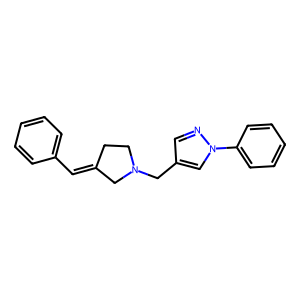

In [ ]:
# draw SMILES using RDKit

from rdkit import Chem
from rdkit.Chem import Draw

smiles = "C(=C1CCN(Cc2cnn(-c3ccccc3)c2)C1)c1ccccc1"
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol)